# 3. Data preprocessing and scaling (데이터 전처리와 스케일 조정)
- 신경망과 SVM 같은 알고리즘은 데이터의 스케일에 매우 민감
- 그래서 보통 이런 알고리즘들에 맞게 데이터의 특성 값을 조정
- 보통 특성마다 스케일을 조정해서 데이터를 변경

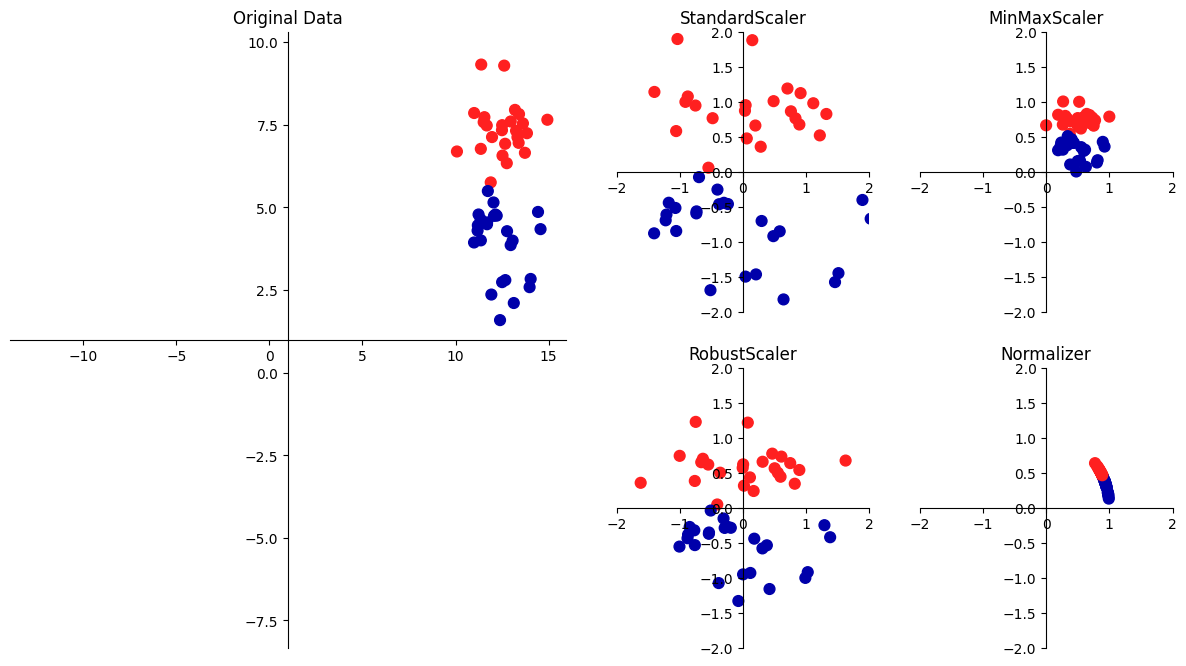

In [57]:
import mglearn

mglearn.plots.plot_scaling()

# 데이터셋의 스케일을 조정하거나 전처리하는 여러 방법

## 3-1. 여러 가지 전처리 방법
- 위 그래프는 두 개의 특성을 인위적으로 만든 이진 분류 데이터셋
- 첫 번째 특성(x축의 값)은 10과 15 사이에 있음
- 두 번째 특성(y축의 값)은 1과 9 사이에 있음
- 오른쪽의 네 그래프는 데이터를 기준이 되는 범위로 변환하는 네 가지 방법을 보여줌
- scikit-learn의 StandardScaler는 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 함
- 그러나 이 방법은 특성의 최솟값과 최댓값 크기를 제한하지는 않음
- RobustScaler는 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 StandardScaler와 비슷
- 하지만 평균과 분산 대신 중간 값 (median)과 사분위 값 (quantile)을 사용함
- 이런 방식 때문에 RobustScaler는 전체 데이터와 아주 동떨어진 데이터 포인트(ex) 측정 에러)에 영향을 받지 암ㅎ음
- 이런 이상 데이터를 이상치(outlier)라 하며 다른 스케일 조정 기법에서는 문제가 될 수 있음
- 반면 MinMaxScaler는 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경
- 2차원 데이터셋일 경우에는 모든 데이터가 x축의 0과 1, y축의 0과 1 사이의 사각 영역에 담기게 됨
- Normalizer는 매우 다른 스케일 조정 기법
- 이 방식은 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정
- 다른 말로 하면 지름이 1인 원(3차원일 땐 구)에 데이터 포인트를 투영
- 이 말은 각 데이터 포인트가 다른 비율로(길이에 반비례하여) 스케일이 조정됨
- 이러한 정규화(normalization)는 특성 벡터의 길이는 상관없고 데이터의 방향(또는 각도)만이 중요할 때 많이 사용

## 3-2. 데이터 변환 적용
- 여러 종류의 변환을 scikit-learn을 사용해 실제로 적용
- 스케일을 조정하는 전처리 메서드들은 보통 지도 학습 알고리즘을 적용하기 전에 적용해야 함
- 예제에는 cancer 데이터셋에 커널 SVM(SVC)을 적용하고 데이터 전처리에는 MinMaxScaler를 사용
- 먼저 데이터를 적재하고 훈련 세트와 테스트 세트로 나눔
- (전처리 후에 만들어진 지도 학습 모델을 평가하려면 훈련 세트와 테스트 세트로 나눠야 함)

In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer =load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


- 이 데이터셋에는 569개의 데이터 포인트가 있고 각 데이터 포인트는 30개의 측정값으로 이뤄져 있음
- 이 데이터셋에서 샘플 426개를 훈련 세트로, 143개를 테스트 세트로 나눴음

In [59]:
# 이전에 만든 지도 학습 모델처럼 먼저 전처리가 구현된 클래스를 임포트하고 객체를 생성
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

- fit 메서드에 훈련 데이터를 적용
- MinMaxScaler의 fit 메서드는 훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산
- 이전의 분류 모델이나 회귀 모델과는 달리 스케일 객체는 fit 메서드를 호출할 때 훈련 데이터(X_train)만 넘겨주며 y_train은 사용하지 않음

In [60]:
scaler.fit(X_train)

MinMaxScaler()

- fit 메서드로 학습한 변환을 적용하려면, 즉 실제로 훈련 데이터의 스케일을 조정하려면 스케일 객체의 transform 메서드를 사용
- scikit-learn의 transform은 새로운 데이터 표현(representation)을 만들 때 사용하는 메서드

In [61]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최솟값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최댓값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최솟값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최댓값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최솟값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


- 변환된 데이터의 배열 크기는 원래 데이터와 동일
- 특성 값이 이동되거나 크기가 조정되었을 뿐
- 예상대로 모든 특성의 값은 0과 1 사이가 됨
- 이 데이터에 SVM을 적용하려면 테스트 세트도 변환해야 함
- 이땐 X_test를 넣어 transform 메서드를 호출해야 함

In [62]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력
print("스케일 조정 후 특성별 최솟값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최댓값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최솟값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


- 일부 특성은 0~1 범위를 벗어나 스케일을 조정한 테스트 세트의 최솟값과 최댓값이 0과 1이 아님
- MinMaxScaler는 (그리고 다른 모든 스케일 모델도) 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 함
- transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고, 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눔

## 3-3. QuantileTransformer와 PowerTransformer
- QuantileTransformer는 기본적으로 1,000개의 분위(quantile)를 사용하여 데이터를 균등하게 분포시킴
- RobustScaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1사이로 압축

In [63]:
# 필요 모듈 임포트
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

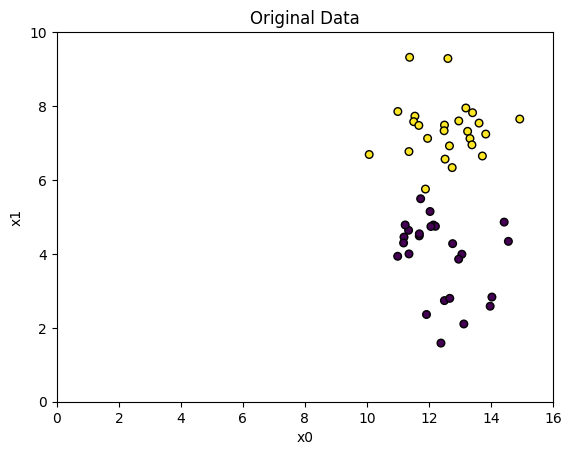

In [64]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="black")
plt.xlim(0, 16)
plt.xlabel("x0")
plt.ylim(0, 10)
plt.ylabel("x1")
plt.title("Original Data")
plt.show()

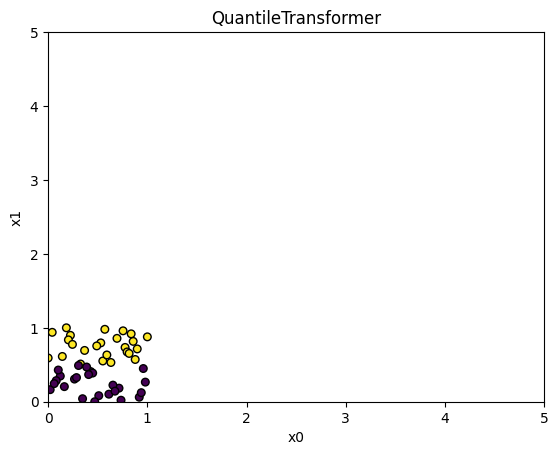

In [65]:
# 이 데이터셋에 QuantileTransformer를 적용해 어떻게 스케일이 변환되는지 확인
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors="black")
plt.xlim(0, 5)
plt.xlabel("x0")
plt.ylim(0, 5)
plt.ylabel("x1")
plt.title(type(scaler).__name__)
plt.show()

# 랜덤하게 흩어져 있던 데이터 포인트들이 두 특성의 0과 1 사이에 고르게 분포되어 있음

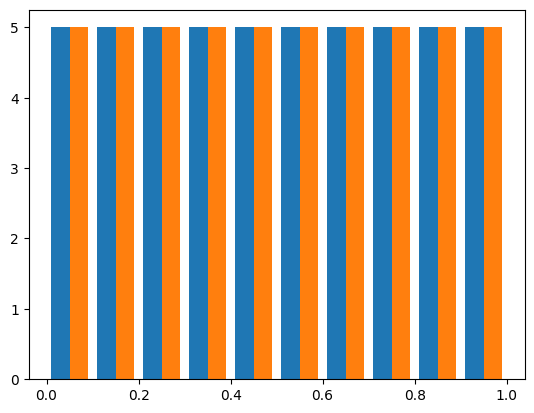

In [66]:
# 변환된 데이터의 히스토그램을 그려보면 균등 분포를 쉽게 확인할 수 있음
plt.hist(X_trans)
plt.show()

- QuantileTransformer의 분위 수는 n_quantiles 매개변수에서 설정할 수 있으며 기본값은 1,000
- scaler 객체의 quantiles_ 속성에는 특성별로 계산된 분위 값이 들어 있으므로 이 속성의 크기는 (n_quantiles, n_features)

In [68]:
print(scaler.quantiles_.shape)

(50, 2)


- 하나의 특성과 다섯 개의 샘플로 이루어진 간단한 데이터셋을 만듦
- np.percentile() 함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환
- 여기에서는 첫번째, 1사분위, 중간값, 3사분위, 마지막 값을 지정
- 훈련 샘플이 모두 다섯 개이므로 지정한 분위가 훈련 샘플과 정확히 일치

In [69]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [70]:
# QuantileTransformer로 변한한 후에 확인
# 예제 데이터가 분위와 동일한 값으로 변환 되었음을 알 수 있음
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


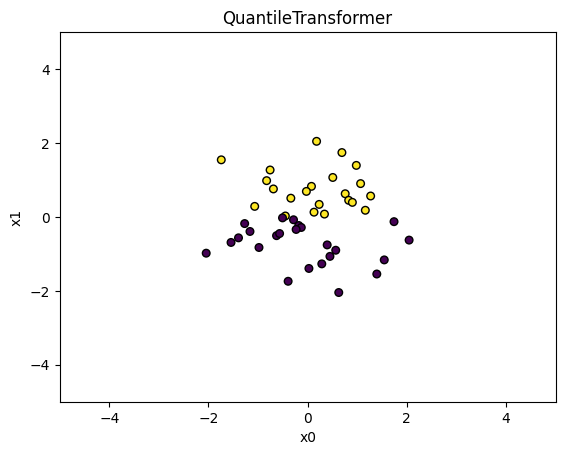

In [71]:
# QuantileTransformer는 output_distribution 매개변수에서 normal로 지정하여 균등 분포가 아니라 정규분포로 출력을 바꿀 수 있음
scaler = QuantileTransformer(output_distribution="normal", n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors="black")
plt.xlim(-5, 5)
plt.xlabel("x0")
plt.ylim(-5, 5)
plt.ylabel("x1")
plt.title(type(scaler).__name__)
plt.show()

- PowerTransformer은 method 매개변수에 'yeo-johnson'와 'box-cox' 알고리즘을 지정할 수 있음. 기본값은 'yeo-johnson'
- QuantileTransformer와 StandardScaler, PowerTransformer의 두 알고리즘이 예제 데이터셋을 정규분포로 변환하는 차이를 확인

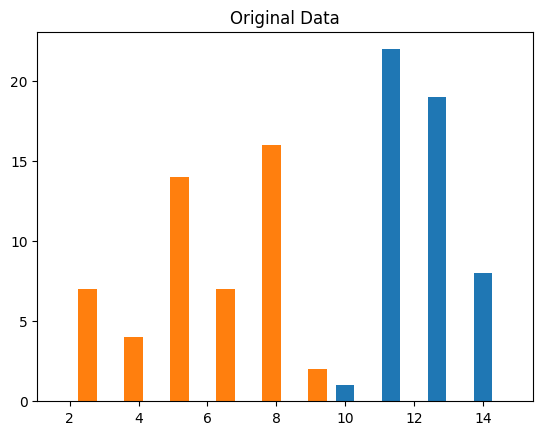

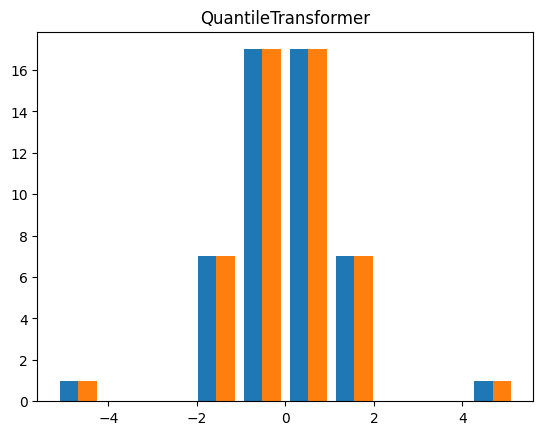

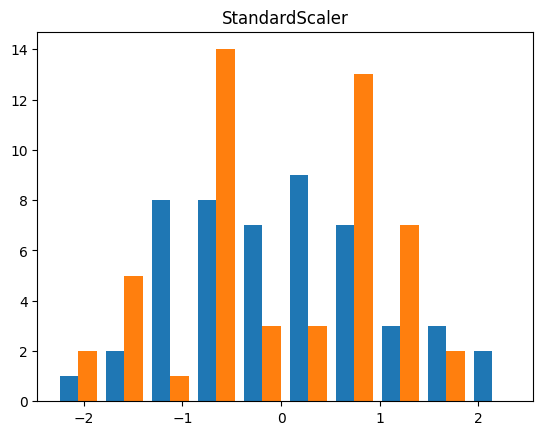

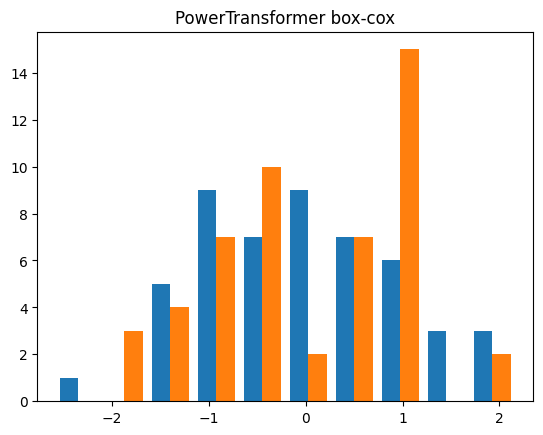

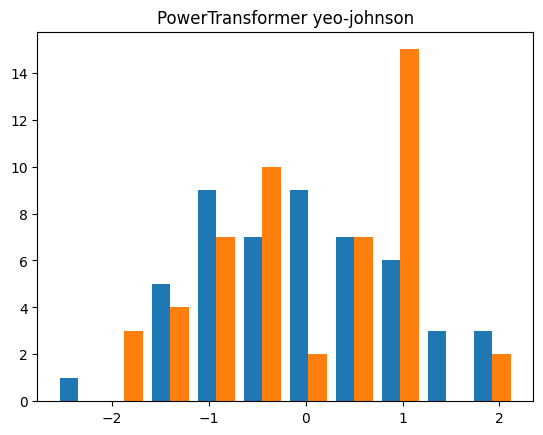

In [72]:
plt.hist(X)
plt.title("Original Data")
plt.show()

X_trans = QuantileTransformer(output_distribution="normal", n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title("QuantileTransformer")
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title("StandardScaler")
plt.show()

X_trans = PowerTransformer(method="box-cox").fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer box-cox")
plt.show()

X_trans = PowerTransformer(method="yeo-johnson").fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer yeo-johnson")
plt.show()

- 위 예에서는 PowerTransformer의 두 알고리즘이 동일한 결과를 만들었음
- 실전에서는 데이터셋마다 어떤 변환이 정규분포에 가깝게 변환할지 사전에 알기 어려움
- 각 변환기의 결과를 히스토그램으로 확인해보는 것이 좋음

## 3-4. 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기
- 지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는 점이 중요

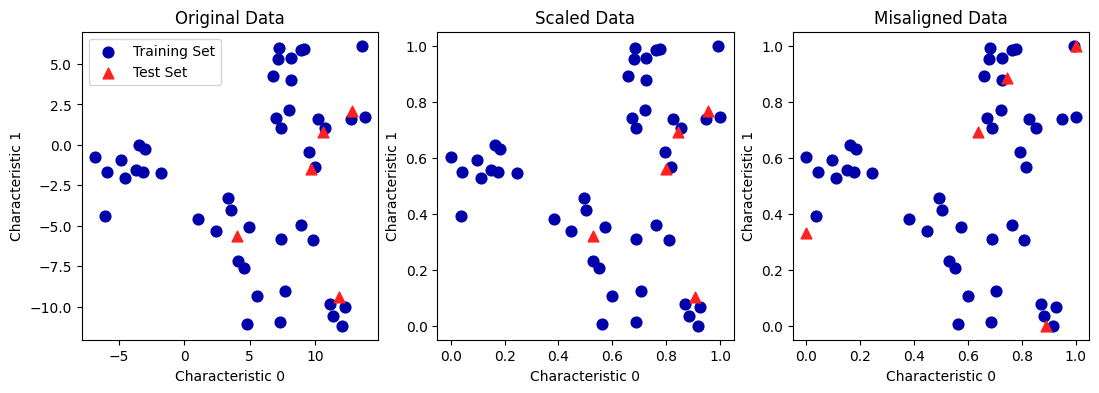

In [74]:
# 테스트 세트의 최솟값과 범위를 사용했을 때 어떤 일이 일어나는지 보여줌
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눔
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# 훈련 세트와 테스트 세트의 산점도를 그림
fix, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label="Training Set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker="^", c=mglearn.cm2.colors[1], label="Test Set", s=60)
axes[0].legend(loc="upper left")
axes[0].set_title("Original Data")

# MinMaxScaler를 사용해 스케일을 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그림
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label="Training Set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker="^", c=mglearn.cm2.colors[1], label="Test Set", s=60)
axes[1].set_title("Scaled Data")

# 테스트 세트의 스케일을 따로 조정
# 테스트 세트의 최솟값은 0, 최댓값은 1
# 이는 예제를 위한 것으로, 절대 이렇게 사용해서는 안 됨
test_scaled = MinMaxScaler()
test_scaled.fit(X_test)
X_test_scaled_badly = test_scaled.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그림
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label="Training Set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker="^", c=mglearn.cm2.colors[1], label="Test Set", s=60)
axes[2].set_title("Misaligned Data")

for ax in axes:
  ax.set_xlabel("Characteristic 0")
  ax.set_ylabel("Characteristic 1")

- 첫 번째 그래프는 2차원 원본 데이터셋이며, 훈련 세트는 원으로 표시하고 테스트 세트는 삼각형으로 나타냈음
- 두 번째 그래프는 같은 데이터를 MinMaxScaler로 스케일을 조정한 것
- 훈련 세트를 사용해 fit 메서드를 호출하고 훈련 세트와 테스트 세트에 transform 메서드를 적용
- 축의 눈금이 바뀐 것만 빼면 두 번째 그래프는 첫 번째 그래프와 동일
- 이제 모든 특성은 0과 1사이엥 놓여 있으나, 테스트 데이터 (삼각형)의 최솟값과 최댓값은 0과 1이 아님
- 세 번째 그래프는 훈련 세트와 테스트 세트의 스케일을 서로 다른 방식으로 조정했을 때 무슨 일이 일어나는지 보여줌
- 이 경우 훈련 세트와 테스트 세트의 최솟값과 최댓값이 모두 0과 1
- 테스트 포인트는 스케일이 다르게 조정되었기 때문에 훈련 세트와 다른 비율로 이동
- 따라서 데이터 배열이 뒤죽박죽된 상태는 원하는 바가 아님
- 다른 방향으로 생각해보면, 포인트가 하나뿐인 테스트 세트를 생각해볼 수 있음
- 하나의 포인트로는 MinMaxScaler에 필요한 최솟값과 최댓값이 없어 스케일을 조정할 수가 없으나, 테스트 세트의 크기 때문에 작업 과정이 달라져서는 안 됨

### 단축 메서드와 효율적인 방법
- 데이터셋에 fit을 적용하면 transform을 호출하는 전형적인 작업이라 fit과 transform을 차례로 호출하는 것보다 효율적인 방법이 필요
- 이럴 때를 위해 transform 메서드를 가진 모델은 fit_transform 메서드를 제공

In [76]:
# StandardScaler를 사용한 예
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메서드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적임
X_scaled_d = scaler.fit_transform(X_train)

# fit_transform이 모든 모델에서 효율이 더 좋은 것은 아니지만, 훈련 세트 변환에 이 메서드를 사용하는 것은 좋은 습관

## 3-5. 지도 학습에서 데이터 전처리 효과
- cancer 데이터셋으로 돌아가서 SVC를 학습시킬 때 MinMaxScaler의 효과를 확인

In [78]:
# 비교를 위해 원본 데이터로 SVC 모델을 만듦
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(gamma="auto")
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


In [ ]:
# SVC 모델을 학습시키기 전에 MinMaxScaler을 사용해 데이터의 스케일을 조정
# 0~1 사이로 스케일 조정
